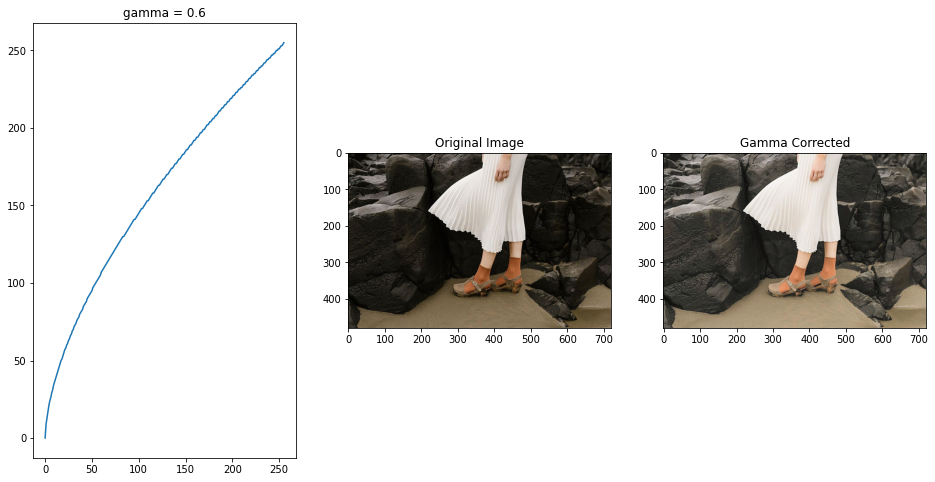

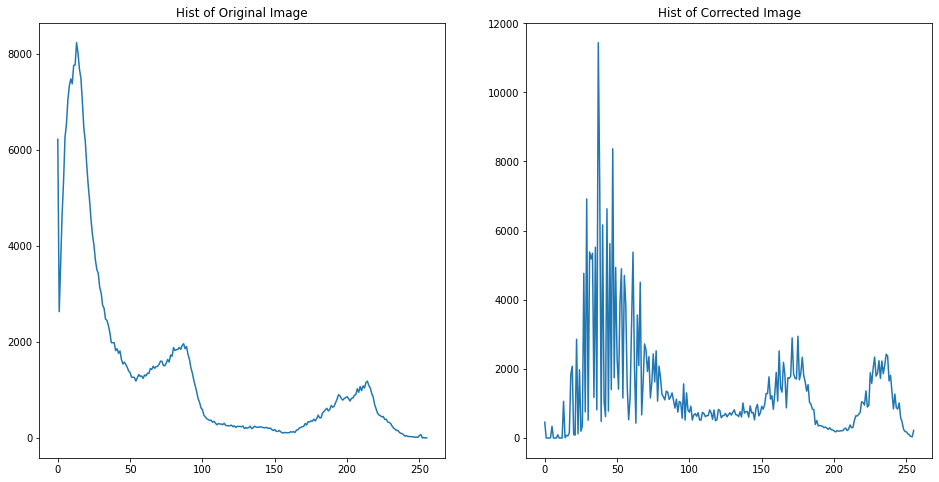

In [1]:
#Question[03]

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(r'C:\Users\ALPHAXANDER\Downloads\highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert img is not None

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

gamma = 0.6

g_2 = cv.cvtColor(img,cv.COLOR_BGR2LAB)
L,a,b = cv.split(g_2)

t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)

img_g = cv.LUT(L,t)
img_gamma = cv.merge([img_g,a,b])

im = cv.cvtColor(img_gamma,cv.COLOR_LAB2RGB)

fig,ax = plt.subplots(1,3,figsize =(16,8))
ax[0].plot(t)
ax[0].set_title('gamma = '+ str(gamma))
ax[1].imshow(img_rgb)
ax[1].set_title('Original Image')
ax[2].imshow(im)
ax[2].set_title('Gamma Corrected')

hist_f = cv.calcHist([img],[0],None,[256],[0,256])
hist_g = cv.calcHist([im],[0],None,[256],[0,256])

fig,ax = plt.subplots(1,2,figsize =(16,8))
ax[0].plot(hist_f)
ax[0].set_title("Hist of Original Image")
ax[1].plot(hist_g)
ax[1].set_title("Hist of Corrected Image")
plt.show()